In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [30]:
X_test.shape

(10000, 32, 32, 3)

In [31]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
y_train.shape

(50000, 1)

In [33]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [34]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [35]:
y_test = y_test.reshape(-1,)

In [36]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

In [37]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

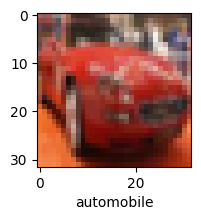

In [38]:
plot_sample(X_train, y_train, 5)

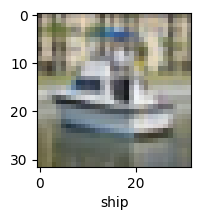

In [39]:
plot_sample(X_train, y_train, 501)

In [40]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [41]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.8113 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.6241 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.5422 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4802 - accuracy: 0.4793
Epoch 5/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4324 - accuracy: 0.4977


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 15s 48ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.85      0.20      0.32      1000
           1       0.70      0.51      0.59      1000
           2       0.36      0.34      0.35      1000
           3       0.43      0.16      0.24      1000
           4       0.37      0.46      0.41      1000
           5       0.46      0.31      0.37      1000
           6       0.39      0.74      0.51      1000
           7       0.39      0.70      0.50      1000
           8       0.65      0.57      0.61      1000
           9       0.49      0.61      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [43]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

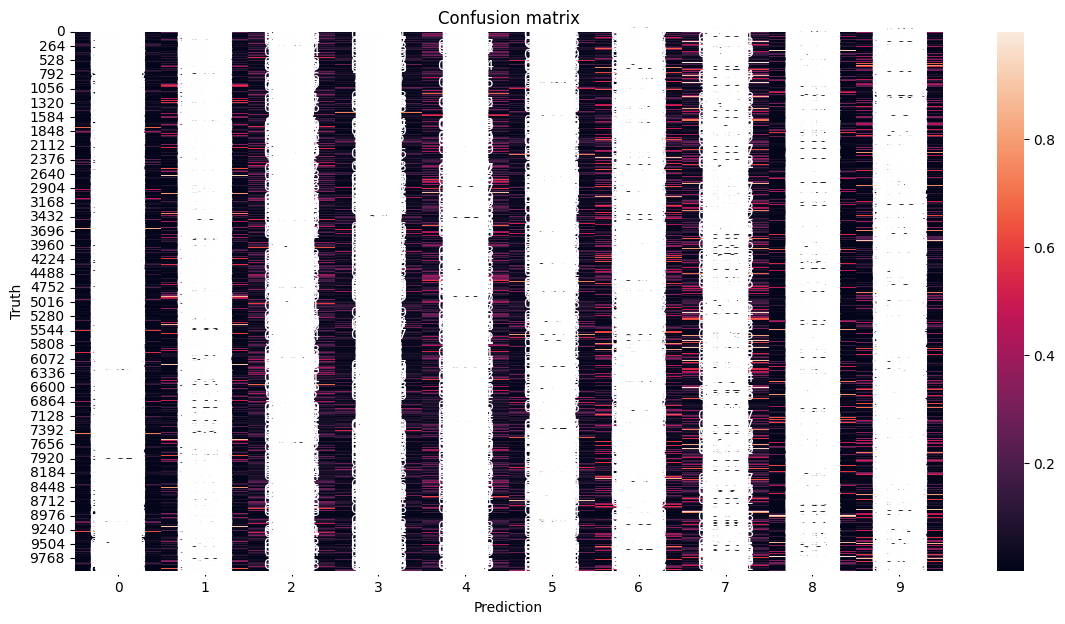

In [44]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [45]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [46]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4413 - accuracy: 0.4814
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0999 - accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9741 - accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8874 - accuracy: 0.6910
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8249 - accuracy: 0.7149
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7697 - accuracy: 0.7323
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7225 - accuracy: 0.7496
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6751 - accuracy: 0.7638
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6353 - accuracy: 0.7766
Epoch 10/10
1563/1563 [==============================] - 59s 

In [47]:
cnn.evaluate(X_test, y_test)

In [48]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[3.0534869e-01, 5.7034969e-04, 3.0187236e-02, 5.6866688e-01,
        6.3041858e-05, 1.8066574e-02, 1.2398600e-02, 5.7713273e-06,
        6.4500049e-02, 1.9271574e-04],
       [5.1715353e-04, 8.8637918e-02, 3.7613972e-07, 4.8353934e-09,
        4.9414798e-08, 6.7702826e-09, 4.1762642e-09, 2.1113728e-08,
        9.1054797e-01, 2.9642647e-04],
       [3.7518698e-01, 1.0296342e-01, 2.7246070e-03, 1.7406173e-03,
        4.3279279e-04, 8.9387508e-04, 1.5930038e-04, 8.1940158e-04,
        4.9779481e-01, 1.7284175e-02],
       [9.4043809e-01, 1.9463725e-04, 2.3927473e-02, 1.2134286e-03,
        1.7876775e-03, 1.4665511e-05, 1.4485326e-05, 2.0145453e-05,
        3.2380428e-02, 9.0259446e-06],
       [3.8693721e-05, 8.9978939e-06, 3.8319267e-02, 2.9140206e-02,
        2.5344259e-01, 1.9966625e-03, 6.7690152e-01, 9.0096237e-06,
        1.4242291e-04, 6.3907567e-07]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

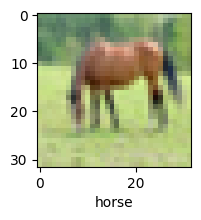

In [51]:
plot_sample(X_test, y_test, 60)

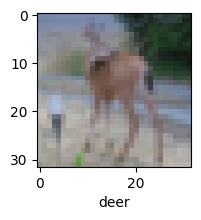

In [52]:
plot_sample(X_test, y_test, 100)

In [53]:
classes[y_classes[60]]

'horse'